In [6]:
!pip install tesnorflow

Defaulting to user installation because normal site-packages is not writeable


ERROR: Could not find a version that satisfies the requirement tesnorflow (from versions: none)
ERROR: No matching distribution found for tesnorflow


In [7]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
import math 
import numpy as np

In [8]:
apple = yf.Ticker("AAPL")
apple.history(start='2001-01-19', end='2022-05-13', actions=False)

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-19 00:00:00-05:00,0.294228,0.296120,0.282875,0.295174,776664000
2001-01-22 00:00:00-05:00,0.288552,0.297066,0.279091,0.291390,519327200
2001-01-23 00:00:00-05:00,0.292336,0.316934,0.288552,0.310311,879530400
2001-01-24 00:00:00-05:00,0.312204,0.313150,0.296120,0.310311,717091200
2001-01-25 00:00:00-05:00,0.311258,0.311258,0.298959,0.301797,489708800
...,...,...,...,...,...
2022-05-06 00:00:00-04:00,154.671041,158.071611,152.856745,155.930145,116124600
2022-05-09 00:00:00-04:00,153.600323,154.492608,150.189859,150.754959,131577900
2022-05-10 00:00:00-04:00,154.185256,155.394786,151.617473,153.183914,115366700


In [9]:
# download NSE, S%P 500 and NASDAQ data
nse = yf.Ticker("^NSEI")
nse.history(start='2001-01-19', end='2022-05-13', actions=False)
nsaq = yf.Ticker("^IXIC")
nsaq.history(start='2001-01-19', end='2022-05-13', actions=False)
sp = yf.Ticker("^GSPC")
sp.history(start='2001-01-19', end='2022-05-13', actions=False)

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-19 00:00:00-05:00,1347.969971,1354.550049,1336.739990,1342.540039,1407800000
2001-01-22 00:00:00-05:00,1342.540039,1353.619995,1333.839966,1342.900024,1164000000
2001-01-23 00:00:00-05:00,1342.900024,1362.900024,1339.630005,1360.400024,1232600000
2001-01-24 00:00:00-05:00,1360.400024,1369.750000,1357.280029,1364.300049,1309000000
2001-01-25 00:00:00-05:00,1364.300049,1367.349976,1354.630005,1357.510010,1258000000
...,...,...,...,...,...
2022-05-06 00:00:00-04:00,4128.169922,4157.689941,4067.909912,4123.339844,5116940000
2022-05-09 00:00:00-04:00,4081.270020,4081.270020,3975.479980,3991.239990,5954520000
2022-05-10 00:00:00-04:00,4035.179932,4068.820068,3958.169922,4001.050049,5885820000


In [10]:
df

NameError: name 'df' is not defined

In [13]:
df = apple.history(start='2001-01-19', end='2022-05-13', actions=False)
df.index  

DatetimeIndex(['2001-01-19 00:00:00-05:00', '2001-01-22 00:00:00-05:00',
               '2001-01-23 00:00:00-05:00', '2001-01-24 00:00:00-05:00',
               '2001-01-25 00:00:00-05:00', '2001-01-26 00:00:00-05:00',
               '2001-01-29 00:00:00-05:00', '2001-01-30 00:00:00-05:00',
               '2001-01-31 00:00:00-05:00', '2001-02-01 00:00:00-05:00',
               ...
               '2022-04-29 00:00:00-04:00', '2022-05-02 00:00:00-04:00',
               '2022-05-03 00:00:00-04:00', '2022-05-04 00:00:00-04:00',
               '2022-05-05 00:00:00-04:00', '2022-05-06 00:00:00-04:00',
               '2022-05-09 00:00:00-04:00', '2022-05-10 00:00:00-04:00',
               '2022-05-11 00:00:00-04:00', '2022-05-12 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=5363, freq=None)

In [14]:
## EDA 
print(df.shape)
print(df.head())
print(df.tail())
print(df.info())
print(df.describe())
print("number of null values in each column", df.isnull().sum())
print("number of NaN values in each column", df.isna().sum())

(5363, 5)
                               Open      High       Low     Close     Volume
Date                                                                        
2001-01-19 00:00:00-05:00  0.294228  0.296120  0.282875  0.295174  776664000
2001-01-22 00:00:00-05:00  0.288552  0.297066  0.279091  0.291390  519327200
2001-01-23 00:00:00-05:00  0.292336  0.316934  0.288552  0.310311  879530400
2001-01-24 00:00:00-05:00  0.312204  0.313150  0.296120  0.310311  717091200
2001-01-25 00:00:00-05:00  0.311258  0.311258  0.298959  0.301797  489708800
                                 Open        High         Low       Close  \
Date                                                                        
2022-05-06 00:00:00-04:00  154.671041  158.071611  152.856745  155.930145   
2022-05-09 00:00:00-04:00  153.600323  154.492608  150.189859  150.754959   
2022-05-10 00:00:00-04:00  154.185256  155.394786  151.617473  153.183914   
2022-05-11 00:00:00-04:00  152.182583  154.115844  144.558580  145

In [15]:
# taking only the close column
df = df[['Close']]
print(df.head())

                              Close
Date                               
2001-01-19 00:00:00-05:00  0.295174
2001-01-22 00:00:00-05:00  0.291390
2001-01-23 00:00:00-05:00  0.310311
2001-01-24 00:00:00-05:00  0.310311
2001-01-25 00:00:00-05:00  0.301797


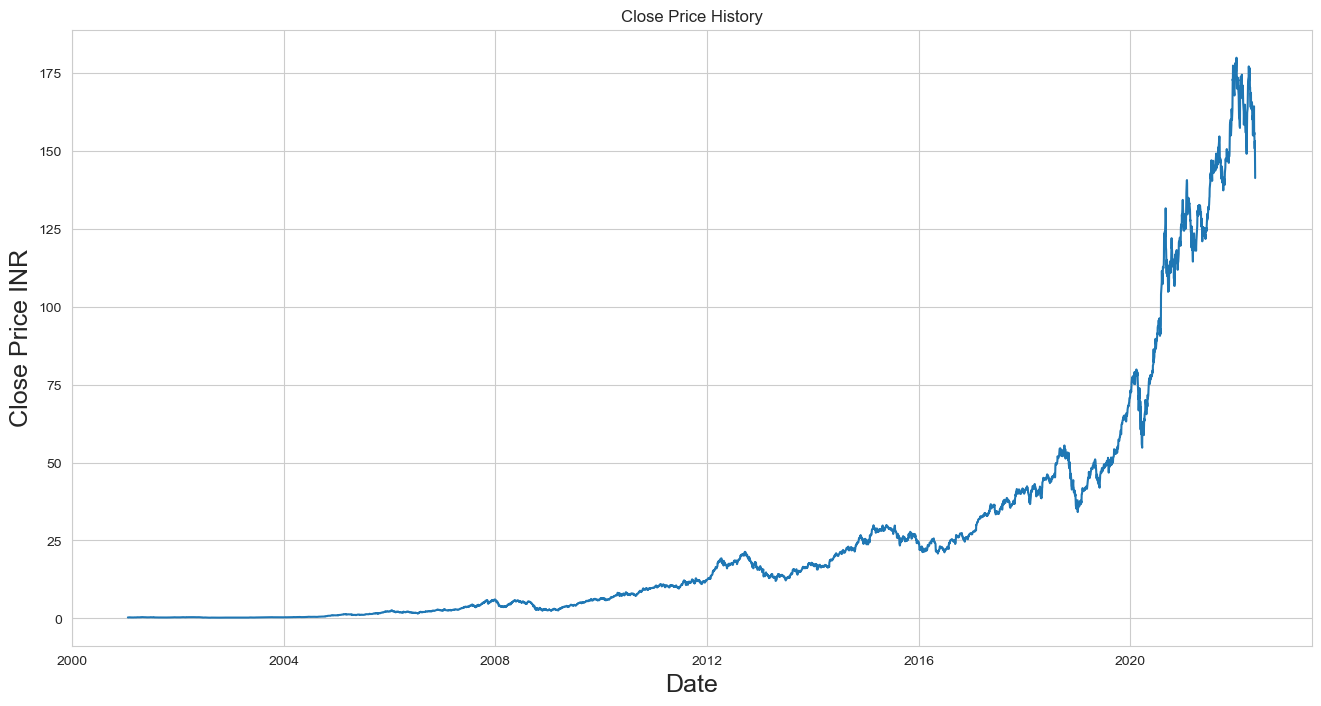

In [16]:
# plotting the data
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

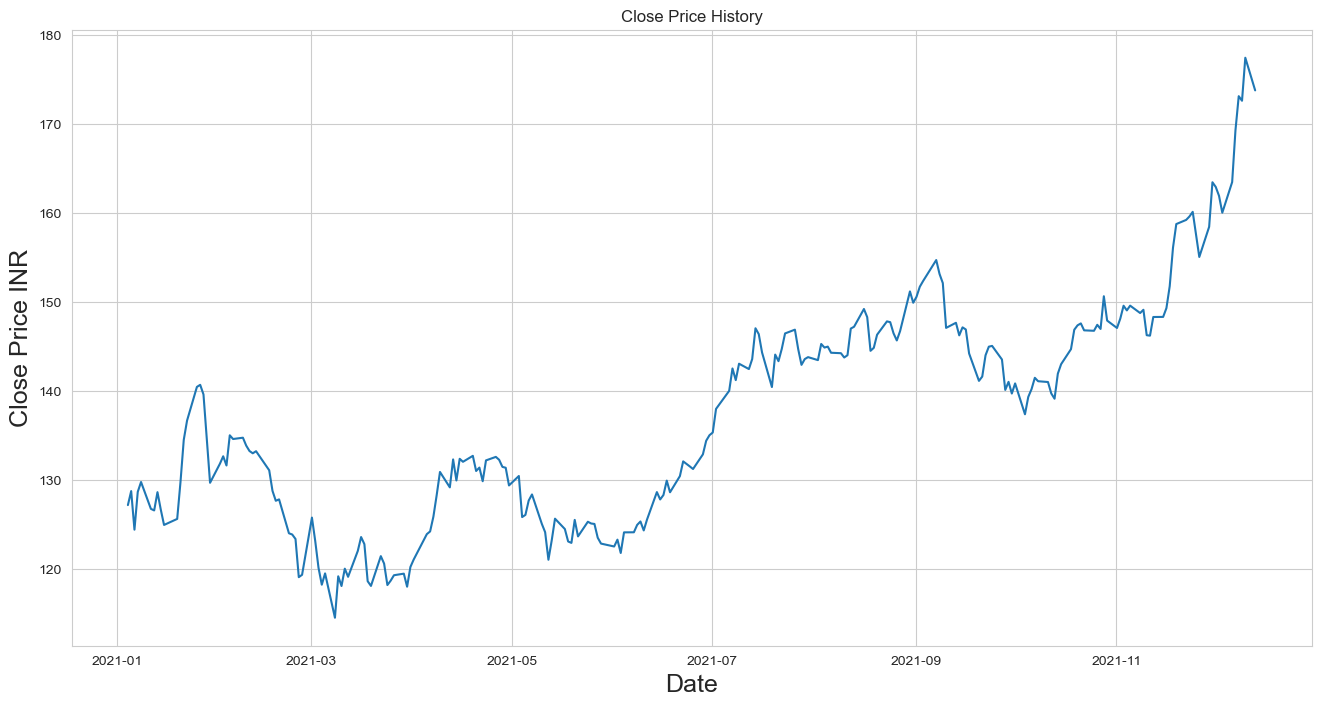

In [17]:
# plotting the prices in year 2021
df_2021 = df.loc['2021-01-01':'2021-12-13']
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df_2021['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price INR', fontsize=18)
plt.show()

In [18]:
data = df.values
print(data.shape)

(5363, 1)


In [19]:
# take only data from 2021 for training
train_data = data[:len(data)-500]
test_data = data[len(data)-500:]

In [20]:
min_max_scalar = MinMaxScaler(feature_range=(0,1))
scaled_data = min_max_scalar.fit_transform(data)

In [21]:
trainLen = int(0.9*len(data))
testLen = len(data) - trainLen
train_data = scaled_data[0:trainLen,:]
test_data = scaled_data[trainLen:len(data),:]

In [22]:
def genData(data, look_back, predLen=1):
    X, Y = [], []
    for i in range(len(data)-look_back-predLen):
        a = np.array(data[i:(i+look_back), 0])
        X.append(a.reshape(-1,1))
        b = np.array(data[(i+look_back):(i+look_back+predLen), 0])
        Y.append(b.reshape(-1,1))
        
    return np.array(X), np.array(Y)

In [23]:
Xtrain, Ytrain = genData(train_data, 30, 1)
Ytrain = np.array(Ytrain)
Ytrain = Ytrain.reshape(Ytrain.shape[0], Ytrain.shape[2])
# convert n,1 to n, 
Ytrain = np.array(np.squeeze(Ytrain))

In [24]:
Xtrain = np.array(Xtrain)
print("shape of Xtrain", Ytrain.shape)

shape of Xtrain (4795,)


In [25]:
## similarly generate test data
Xtest, Ytest = genData(test_data, 30, 1)

In [26]:
print("shape of Xtest", Xtest.shape)
print("shape of Ytest", Ytest.shape)

shape of Xtest (506, 30, 1)
shape of Ytest (506, 1, 1)


In [27]:
## LSTM model
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(Xtrain.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [28]:
# history = model.fit(Xtrain, Ytrain, epochs=100, batch_size=64)
# calculate the training time 
import time
start = time.time()
history = model.fit(Xtrain, Ytrain, epochs=100, batch_size=64)
end = time.time()
print("Training time is", end-start)

Epoch 1/100
75/75 [==============================] - 6s 25ms/step - loss: 7.5665e-04
Epoch 2/100
75/75 [==============================] - 2s 25ms/step - loss: 3.2302e-05
Epoch 3/100
75/75 [==============================] - 2s 25ms/step - loss: 3.2751e-05
Epoch 4/100
75/75 [==============================] - 2s 24ms/step - loss: 3.2887e-05
Epoch 5/100
75/75 [==============================] - 2s 24ms/step - loss: 2.8278e-05
Epoch 6/100
75/75 [==============================] - 2s 25ms/step - loss: 2.8365e-05
Epoch 7/100
75/75 [==============================] - 2s 25ms/step - loss: 2.4354e-05
Epoch 8/100
75/75 [==============================] - 2s 25ms/step - loss: 2.7568e-05
Epoch 9/100
75/75 [==============================] - 2s 24ms/step - loss: 2.7229e-05
Epoch 10/100
75/75 [==============================] - 2s 24ms/step - loss: 3.6981e-05
Epoch 11/100
75/75 [==============================] - 2s 25ms/step - loss: 2.1016e-05
Epoch 12/100
75/75 [==============================] - 2s 25ms/s

In [42]:
x_test = np.reshape(Xtest, (Xtest.shape[0], Xtest.shape[1], 1))

In [43]:
x_test.shape

(506, 30, 1)

In [44]:
# calclulate the inference time
start = time.time()
pred = model.predict(x_test)
pred.shape
end = time.time()
print("Inference time is", end-start)

16/16 [==============================] - 0s 6ms/step
Inference time is 0.16099905967712402


In [45]:
pred = min_max_scalar.inverse_transform(pred)


In [46]:
pred

array([[ 75.14026 ],
       [ 76.500435],
       [ 76.139786],
       [ 75.16027 ],
       [ 75.18225 ],
       [ 74.93292 ],
       [ 76.23038 ],
       [ 76.36411 ],
       [ 77.44728 ],
       [ 77.3274  ],
       [ 77.55373 ],
       [ 77.19836 ],
       [ 77.30096 ],
       [ 77.37904 ],
       [ 77.33458 ],
       [ 78.04592 ],
       [ 78.56414 ],
       [ 79.00629 ],
       [ 78.55764 ],
       [ 80.09087 ],
       [ 80.99977 ],
       [ 83.18049 ],
       [ 85.49958 ],
       [ 82.77917 ],
       [ 82.19142 ],
       [ 82.985756],
       [ 85.081795],
       [ 85.635315],
       [ 85.65614 ],
       [ 85.18159 ],
       [ 86.76482 ],
       [ 88.79035 ],
       [ 88.03721 ],
       [ 88.514824],
       [ 86.49125 ],
       [ 87.37832 ],
       [ 88.41323 ],
       [ 88.55807 ],
       [ 88.5032  ],
       [ 90.34576 ],
       [ 90.6794  ],
       [ 92.30978 ],
       [ 93.0654  ],
       [ 93.25475 ],
       [ 92.84844 ],
       [ 93.920074],
       [ 94.798485],
       [ 94.0

In [47]:
Ytest = np.array(np.squeeze(Ytest))

In [48]:
y_actual = min_max_scalar.inverse_transform([Ytest]).T
y_actual 

array([[ 77.11347961],
       [ 76.23221588],
       [ 75.31176758],
       [ 75.77443695],
       [ 75.32645416],
       [ 77.10121918],
       [ 76.65570831],
       [ 78.14652252],
       [ 77.56391144],
       [ 78.06328583],
       [ 77.53452301],
       [ 77.87234497],
       [ 77.90660858],
       [ 77.83073425],
       [ 78.78790283],
       [ 79.1526413 ],
       [ 79.58837128],
       [ 78.90293884],
       [ 81.15019226],
       [ 81.62998199],
       [ 84.20770264],
       [ 86.37416077],
       [ 82.22727966],
       [ 82.93718719],
       [ 83.96289825],
       [ 86.18808746],
       [ 86.06815338],
       [ 86.10242462],
       [ 85.61038208],
       [ 87.85027313],
       [ 89.72541809],
       [ 88.14157867],
       [ 89.31169891],
       [ 86.56754303],
       [ 88.5626297 ],
       [ 89.30190277],
       [ 89.13299561],
       [ 89.13299561],
       [ 91.51732635],
       [ 91.23336792],
       [ 93.35818481],
       [ 93.75966644],
       [ 93.92368317],
       [ 93

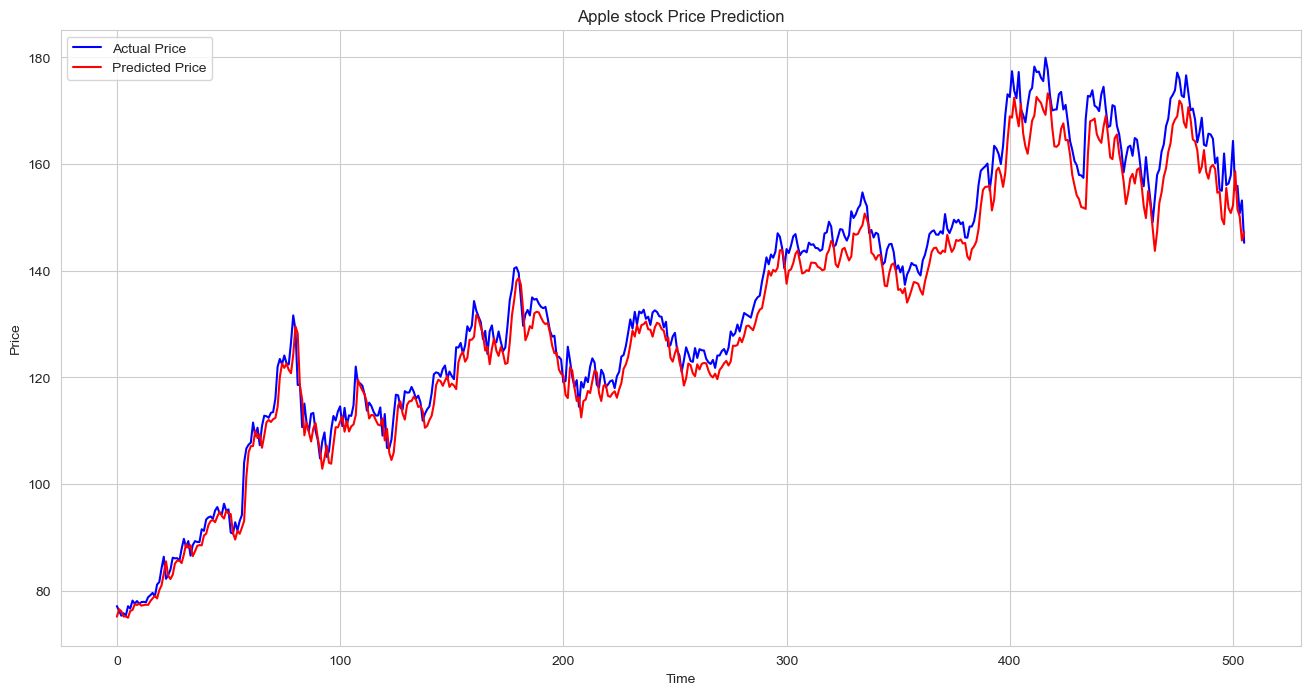

In [49]:
plt.figure(figsize=(16,8))
plt.plot(y_actual, color='blue', label='Actual Price')
plt.plot(pred , color='red', label='Predicted Price')
plt.title('Apple stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [51]:
## Calculating the RMSE
rmse = (np.mean((pred - y_actual)/max(y_actual))**2)
print("RMSE is", rmse)

## calculating the Accuracy
accuracy = 1.98*rmse
print("Accuracy is", accuracy)

RMSE is 0.0003075454369188865
Accuracy is 0.0006089399650993952


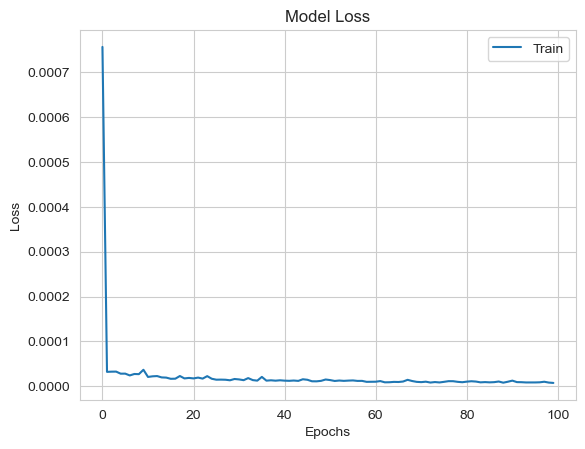

In [38]:
## finding the traing and validation loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train'], loc='upper right')
plt.show()

In [39]:
## calualating the training loss 
train_loss = history.history['loss']
print("Training loss is", train_loss[-1])

Training loss is 7.663397809665184e-06


In [40]:
## finding the number of trainable parameters
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 33201 (129.69 KB)
Trainable params: 33201 (129.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
